<a href="https://colab.research.google.com/github/Joel-Vijo/Dino_names_generator/blob/main/LSTM_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torch.nn as nn
import numpy as np
import random
import matplotlib.pyplot  as plt

In [ ]:
data = open('dinosaurs.csv', 'r').read() 
data = data.lower()
chars = list(set(data))
chars.remove('\n')
chars.sort()
print(chars)
data_size, chars_size = len(data), len(chars)

print("data size= " ,data_size)
print("no of unique chars = " ,chars_size)

char_to_ix = {ch:i for i,ch in enumerate(chars)}   
ix_to_char = {i:ch for i,ch in enumerate(chars)}    
data = data.split('\n')
print(data)
print(list(data[0]))
random.shuffle(data)

['_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
data size=  19656
no of unique chars =  27
['aachenosaurus', 'aardonyx', 'abelisaurus', 'abrictosaurus', 'abrosaurus', 'abydosaurus', 'acantholipan', 'acanthopholis', 'achelousaurus', 'acheroraptor', 'achillesaurus', 'achillobator', 'acristavus', 'acrocanthosaurus', 'acrotholus', 'actiosaurus', 'adamantisaurus', 'adasaurus', 'adelolophus', 'adeopapposaurus', 'adratiklit', 'adynomosaurus', 'aegyptosaurus', 'aeolosaurus', 'aepisaurus', 'aepyornithomimus', 'aerosteon', 'afromimus', 'aetonyx', 'afrovenator', 'agathaumas', 'aggiosaurus', 'agilisaurus', 'agnosphitys', 'agrosaurus', 'agujaceratops', 'agustinia', 'ahshislepelta', 'airakoraptor', 'ajancingenia', 'ajkaceratops', 'akainacephalus', 'alamosaurus', 'alaskacephale', 'albalophosaurus', 'albertaceratops', 'albertadromeus', 'albertavenator', 'albertonykus', 'albertosaurus', 'albinykus', 'alcovasaurus', 

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.input_size = input_size 
        self.output_size = input_size 
        self.rnn=nn.LSTM(input_size,hidden_size)
        self.h2o=nn.Linear(hidden_size,input_size)

    def forward(self, input, hidden):

        output,hidden=self.rnn(input,hidden)
        output=self.h2o(output[0])
        return hidden , output 

In [ ]:
learning_rate = 0.001

model = RNN(input_size=chars_size, hidden_size=100)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
no_of_epochs=30
hidden_size=100
loss=[]
for i in range(no_of_epochs):
    epoch_loss = 0
    n = 0
    for word in data:
        hidden=(torch.zeros((1, 1, hidden_size)),
                torch.zeros((1, 1, hidden_size)))
        letters=list(word)
        outputs=torch.zeros([len(letters)+1,chars_size])
        target=list()
        for c in letters:
          target.append(char_to_ix[c])
        target.append(char_to_ix['_'])
        target_tensor=torch.LongTensor(target)
        outputs[0,char_to_ix[letters[0]]]=1
        i=0
        batch_loss=0
        while(i<len(letters)):
          input=torch.zeros([1,chars_size],dtype=torch.float)
          input[0,char_to_ix[letters[i]]]=1
          input=input.unsqueeze(1)
          hidden,output=model(input,hidden)
          outputs[i+1]=output
          i+=1
        batch_loss=criterion(outputs,target_tensor)
        epoch_loss+=batch_loss
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
        n+=1
    epoch_loss=epoch_loss/n
    print(epoch_loss.item())
    loss.append(epoch_loss.item())

2.2027978897094727
1.8662132024765015
1.7567355632781982
1.6863574981689453
1.6312346458435059
1.583836317062378
1.5402215719223022
1.4988324642181396
1.4582804441452026
1.4176867008209229
1.3771041631698608
1.3364182710647583
1.2956037521362305
1.2553993463516235
1.2170181274414062
1.1800315380096436
1.1464611291885376
1.1158496141433716
1.0837907791137695
1.0598528385162354
1.0338093042373657
1.0077213048934937
0.9882451295852661
0.969087541103363
0.9521039724349976
0.9339308738708496
0.9167309403419495
0.8985525369644165
0.887850821018219
0.8731667995452881


In [ ]:
model.eval()
hidden_size = 100
for letter in chars:
    if(letter!="_"):
      print(letter,"-",end="")
      print(letter,end="")
      char = letter
      input_idx = char_to_ix[char]
      input = torch.zeros([1, chars_size], dtype=torch.float)
      input[0, input_idx] = 1
      input=input.unsqueeze(1)
      

      hidden=(torch.zeros((1, 1, hidden_size)),
                torch.zeros((1, 1, hidden_size)))
      idx = torch.tensor(char_to_ix[letter])
      i=0
      while ix_to_char[idx.item()] != "_":
          i+=1
          hidden, output = model(input, hidden)
          idx = output.argmax()
          input = torch.zeros([1, chars_size], dtype=torch.float)
          input[0, idx] = 1
          input=input.unsqueeze(1)
          if(ix_to_char[idx.item()]!="_"):
            print(ix_to_char[idx.item()],end="")
      print("")

a -almas
b -baryanosaurus
c -changangosaurus
d -dinodocus
e -eocandongxusaurus
f -fukuisaurus
g -galleonausaurus
h -hepsastoolanussan
i -ingentia
j -jiangshanosaurus
k -kakuingasaurus
l -laptarsaurus
m -marisaurus
n -nanosaurus
o -ornithomesaurus
p -pareinocophale
q -qiapialetatausaurus
r -rahonavis
s -sinosauropteryx
t -tatisaurus
u -urugolex
v -velafrimimus
w -walkeria
x -xiaosaurus
y -yunnanosaurus
z -zuolong


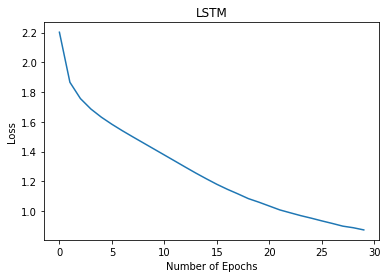

In [ ]:
plt.title("LSTM")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(loss, label = "Training Loss")
plt.show()